<a href="https://colab.research.google.com/github/soham7707/Portfolio_Agents/blob/main/Lattice_Struct_Bearish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance arch statsmodels matplotlib pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.1 MB/s eta 0:00:00


In [2]:
pip install numpy pandas matplotlib yfinance arch statsmodels scikit-learn tensorflow


=== BULLISH MARKET ANALYSIS (2023-03-01 to 2023-07-31) ===



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


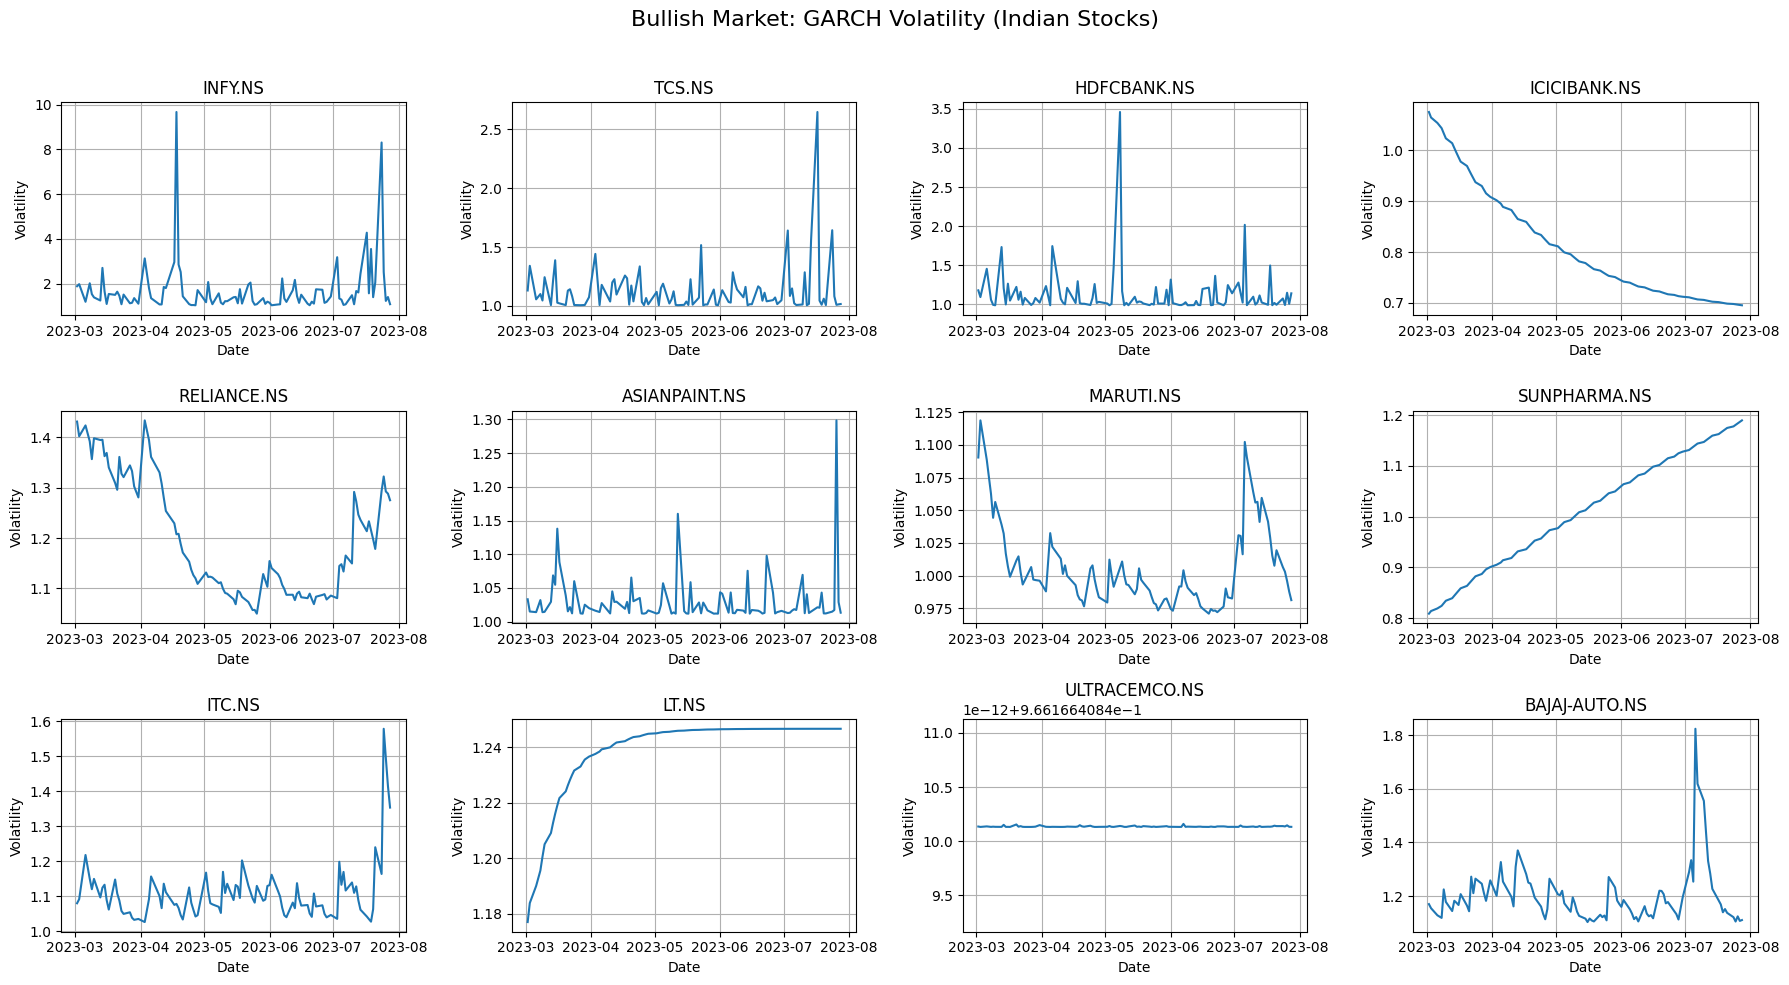

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

        Stock   Beta  Avg_GARCH_Volatility
 ICICIBANK.NS 0.8406                0.8064
ULTRACEMCO.NS 0.5736                0.9662
    MARUTI.NS 0.4506                1.0059
 SUNPHARMA.NS 0.2947                1.0168
ASIANPAINT.NS 0.2618                1.0298
       ITC.NS 0.7836                1.1102
  HDFCBANK.NS 1.2456                1.1221
       TCS.NS 0.9347                1.1235
  RELIANCE.NS 1.5036                1.1960
BAJAJ-AUTO.NS 0.7050                1.1987
        LT.NS 0.6724                1.2395
      INFY.NS 1.6759                1.6901

✅ Safest Option in BULLISH Market: ICICIBANK.NS (Beta=0.8406, Vol=0.8064)


=== BEARISH MARKET ANALYSIS (2022-09-01 to 2022-12-31) ===




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


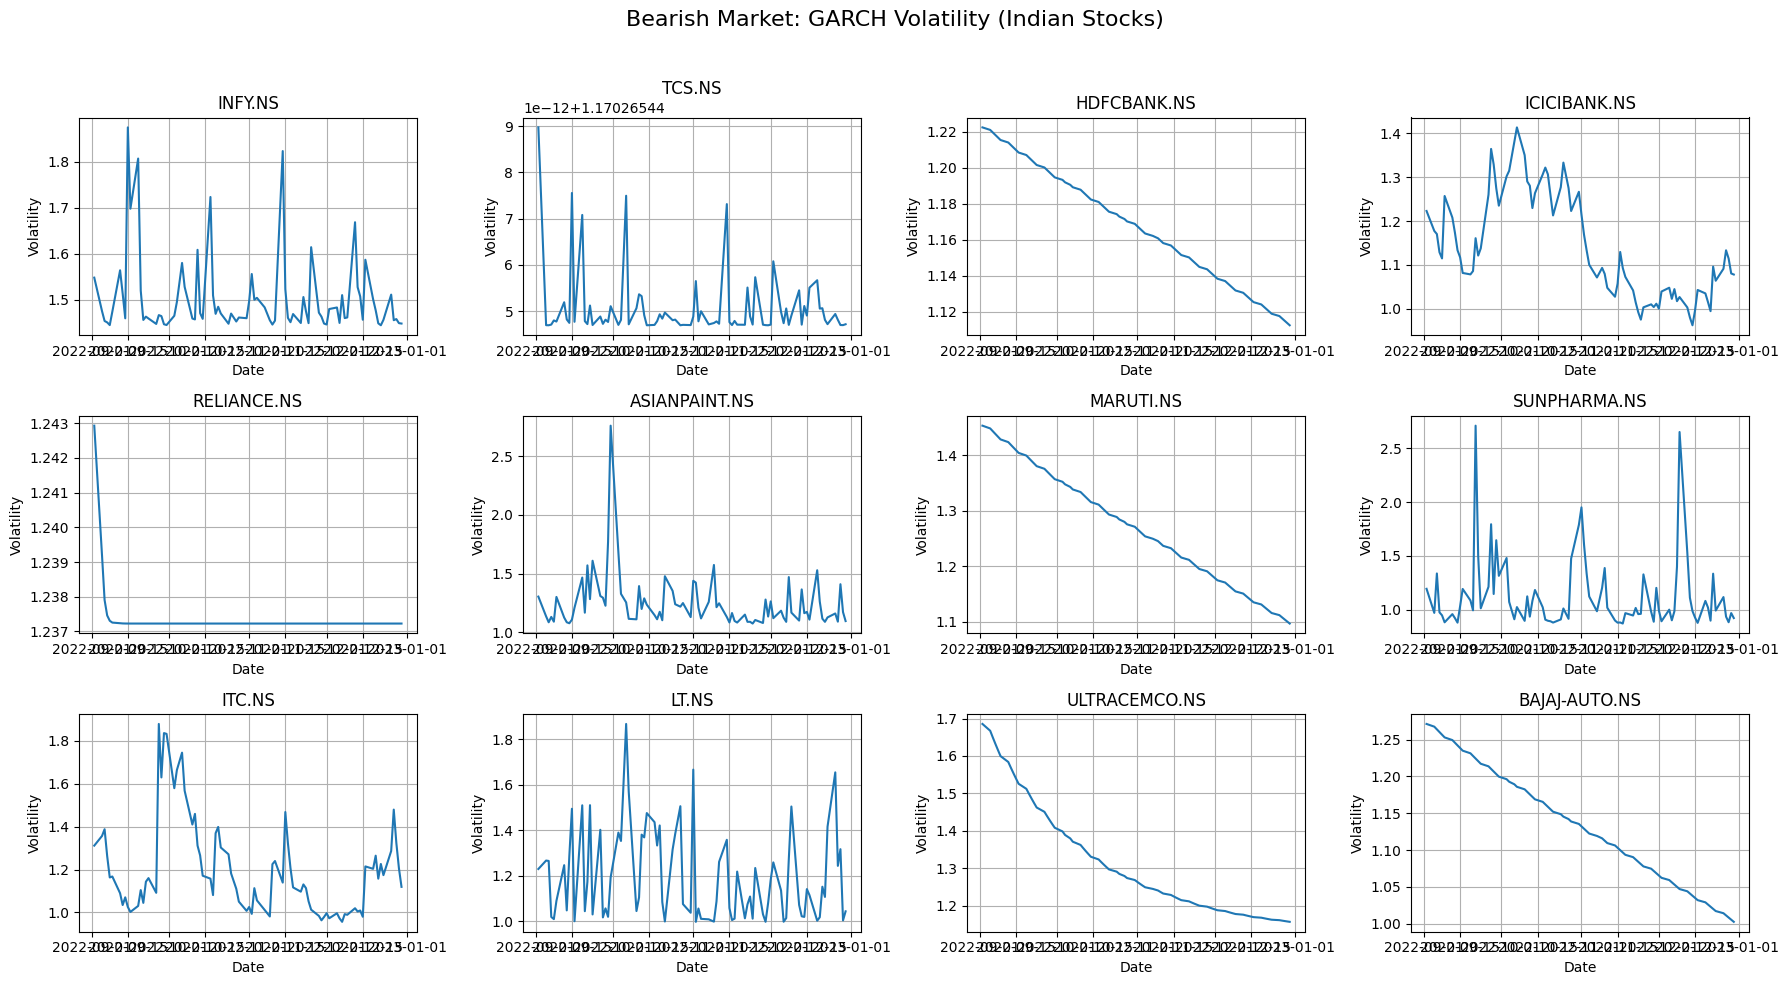

        Stock   Beta  Avg_GARCH_Volatility
 SUNPHARMA.NS 0.4088                1.1302
BAJAJ-AUTO.NS 0.8656                1.1316
 ICICIBANK.NS 0.9622                1.1407
  HDFCBANK.NS 1.1625                1.1666
       TCS.NS 0.8844                1.1703
        LT.NS 1.0514                1.1938
       ITC.NS 0.8304                1.1987
  RELIANCE.NS 1.1060                1.2373
ASIANPAINT.NS 0.3966                1.2443
    MARUTI.NS 0.8566                1.2666
ULTRACEMCO.NS 1.0092                1.3121
      INFY.NS 1.2140                1.5010

✅ Safest Option in BEARISH Market: SUNPHARMA.NS (Beta=0.4088, Vol=1.1302)



In [3]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import statsmodels.api as sm

# Periods (can be fine-tuned)
bullish_period = ('2023-03-01', '2023-07-31')
bearish_period = ('2022-09-01', '2022-12-31')

# Indian stocks list
stocks = [
    "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "RELIANCE.NS",
    "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ITC.NS", "LT.NS",
    "ULTRACEMCO.NS", "BAJAJ-AUTO.NS", "TITAN.NS", "WIPRO.NS", "ZOMATO.NS"
]
index_symbol = "^NSEI"  # Nifty 50

def analyze_stocks(period, label):
    start, end = period
    print(f"\n=== {label.upper()} MARKET ANALYSIS ({start} to {end}) ===\n")

    results = []
    index_data = yf.download(index_symbol, start=start, end=end, auto_adjust=False)['Adj Close']
    index_returns = np.log(index_data / index_data.shift(1)).dropna()

    plt.figure(figsize=(18, 10))
    plt.suptitle(f"{label.capitalize()} Market: GARCH Volatility (Indian Stocks)", fontsize=16)

    for i, stock in enumerate(stocks[:12]):  # Plot only 12 to avoid clutter
        try:
            stock_data = yf.download(stock, start=start, end=end, auto_adjust=False)['Adj Close']
            stock_returns = np.log(stock_data / stock_data.shift(1)).dropna()
            combined = pd.concat([stock_returns, index_returns], axis=1).dropna()
            combined.columns = ['Stock', 'Market']

            # Beta calculation
            X = sm.add_constant(combined['Market'])
            model = sm.OLS(combined['Stock'], X).fit()
            beta = model.params['Market']

            # GARCH volatility
            am = arch_model(combined['Stock'] * 100, vol='GARCH', p=1, q=1)
            res = am.fit(disp='off')
            avg_vol = np.mean(res.conditional_volatility)

            # Plot GARCH
            plt.subplot(3, 4, i + 1)
            plt.plot(res.conditional_volatility, label=stock)
            plt.title(f"{stock}")
            plt.grid(True)
            plt.xlabel("Date")
            plt.ylabel("Volatility")

            results.append({
                'Stock': stock,
                'Beta': round(beta, 4),
                'Avg_GARCH_Volatility': round(avg_vol, 4)
            })

        except Exception as e:
            print(f"Error processing {stock}: {e}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    df = pd.DataFrame(results)
    df = df.sort_values(by=['Avg_GARCH_Volatility', 'Beta'])
    print(df.to_string(index=False))

    safest = df.iloc[0]
    print(f"\n✅ Safest Option in {label.upper()} Market: {safest['Stock']} (Beta={safest['Beta']}, Vol={safest['Avg_GARCH_Volatility']})\n")
    return df

# Run both periods
bullish_df = analyze_stocks(bullish_period, 'bullish')
bearish_df = analyze_stocks(bearish_period, 'bearish')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


=== BULLISH MARKET ANALYSIS (2023-03-01 to 2023-07-31) ===




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


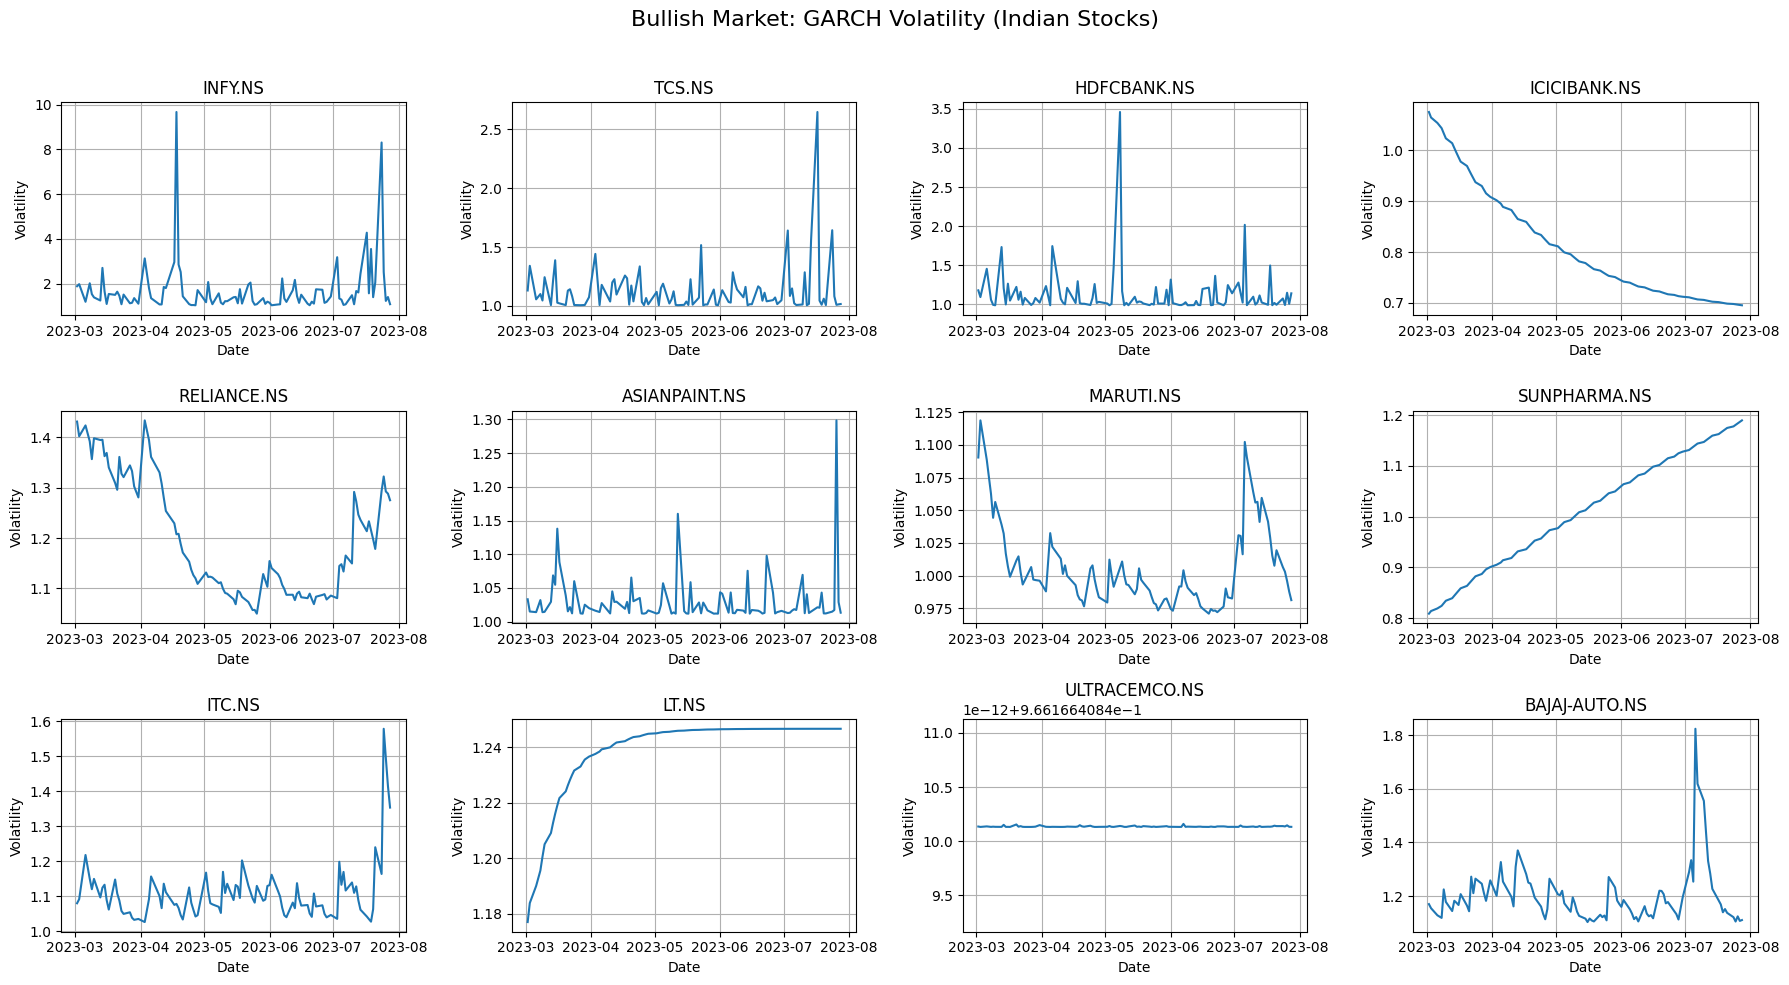

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

        Stock   Beta  Avg_GARCH_Volatility
 ICICIBANK.NS 0.8406                0.8064
ULTRACEMCO.NS 0.5736                0.9662
    MARUTI.NS 0.4506                1.0059
 SUNPHARMA.NS 0.2947                1.0168
ASIANPAINT.NS 0.2618                1.0298
       ITC.NS 0.7836                1.1102
  HDFCBANK.NS 1.2456                1.1221
       TCS.NS 0.9347                1.1235
  RELIANCE.NS 1.5036                1.1960
BAJAJ-AUTO.NS 0.7050                1.1987
        LT.NS 0.6724                1.2395
      INFY.NS 1.6759                1.6901

✅ Safest Option in BULLISH Market: ICICIBANK.NS (Beta=0.8406, Vol=0.8064)


=== BEARISH MARKET ANALYSIS (2022-09-01 to 2022-12-31) ===




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


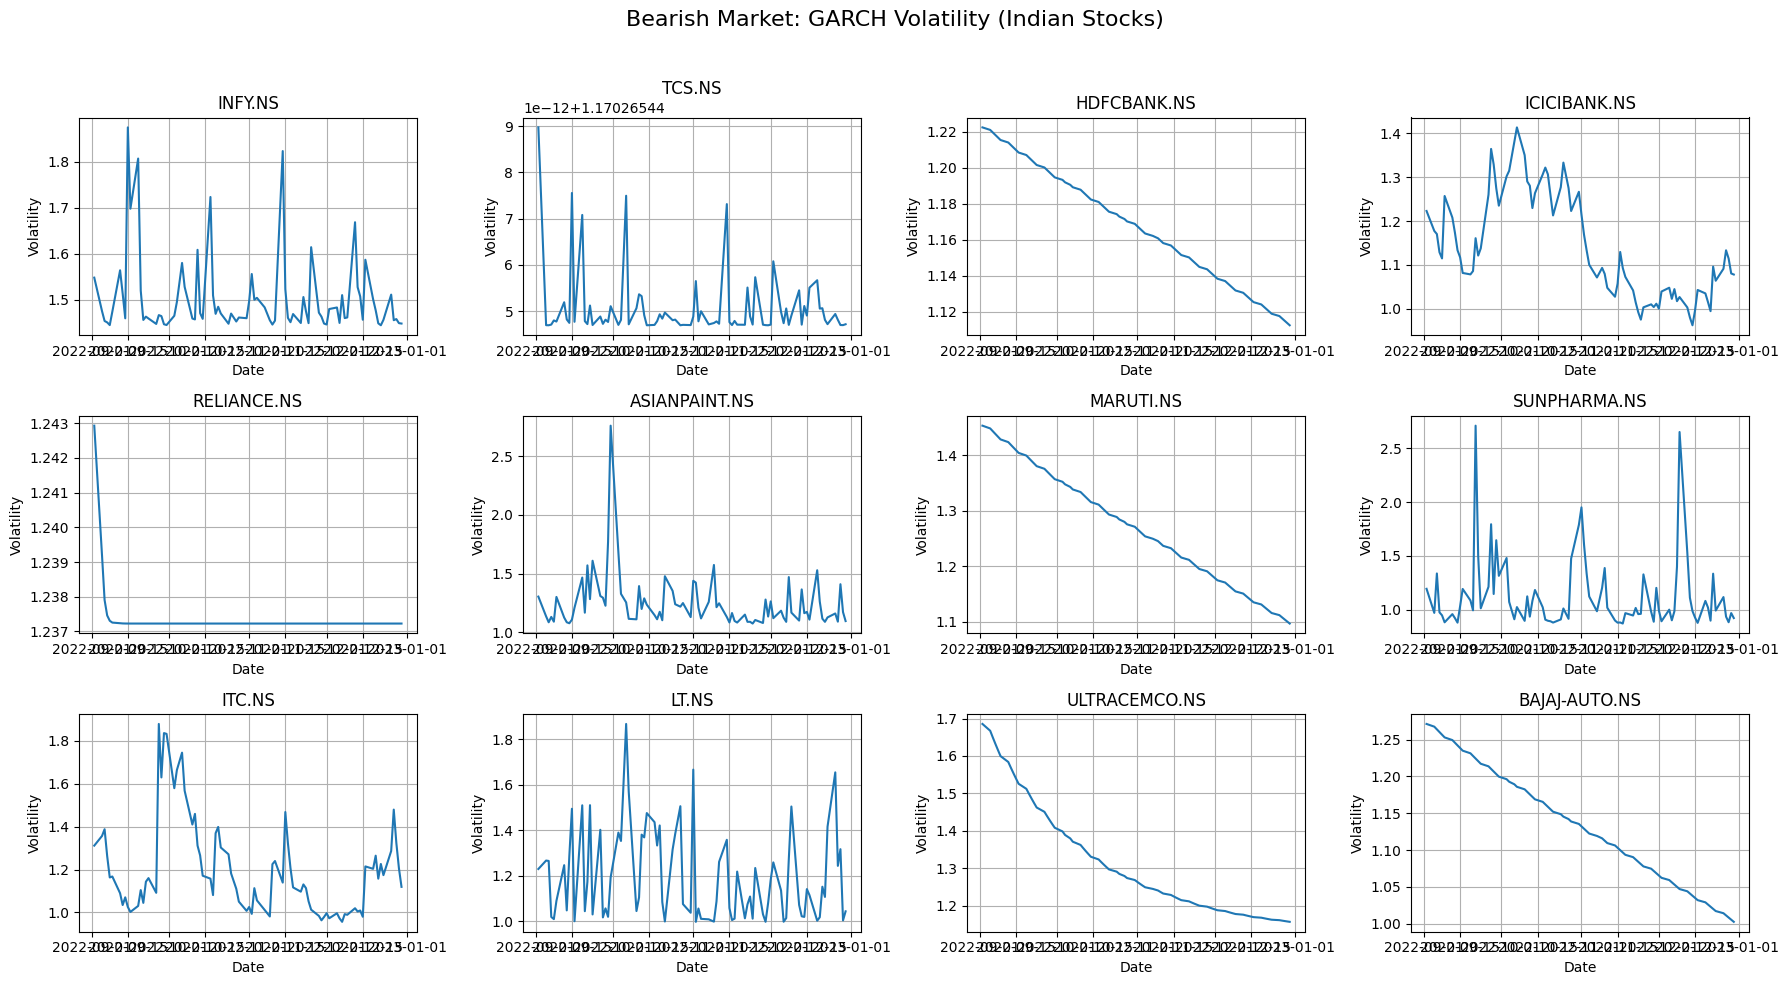

        Stock   Beta  Avg_GARCH_Volatility
 SUNPHARMA.NS 0.4088                1.1302
BAJAJ-AUTO.NS 0.8656                1.1316
 ICICIBANK.NS 0.9622                1.1407
  HDFCBANK.NS 1.1625                1.1666
       TCS.NS 0.8844                1.1703
        LT.NS 1.0514                1.1938
       ITC.NS 0.8304                1.1987
  RELIANCE.NS 1.1060                1.2373
ASIANPAINT.NS 0.3966                1.2443
    MARUTI.NS 0.8566                1.2666
ULTRACEMCO.NS 1.0092                1.3121
      INFY.NS 1.2140                1.5010

✅ Safest Option in BEARISH Market: SUNPHARMA.NS (Beta=0.4088, Vol=1.1302)



In [4]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import statsmodels.api as sm

# Periods (can be fine-tuned)
bullish_period = ('2023-03-01', '2023-07-31')
bearish_period = ('2022-09-01', '2022-12-31')

# Indian stocks list
stocks = [
    "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "RELIANCE.NS",
    "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ITC.NS", "LT.NS",
    "ULTRACEMCO.NS", "BAJAJ-AUTO.NS", "TITAN.NS", "WIPRO.NS", "ZOMATO.NS"
]
index_symbol = "^NSEI"  # Nifty 50

def analyze_stocks(period, label):
    start, end = period
    print(f"\n=== {label.upper()} MARKET ANALYSIS ({start} to {end}) ===\n")

    results = []
    index_data = yf.download(index_symbol, start=start, end=end, auto_adjust=False)['Adj Close']
    index_returns = np.log(index_data / index_data.shift(1)).dropna()

    plt.figure(figsize=(18, 10))
    plt.suptitle(f"{label.capitalize()} Market: GARCH Volatility (Indian Stocks)", fontsize=16)

    for i, stock in enumerate(stocks[:12]):  # Plot only 12 to avoid clutter
        try:
            stock_data = yf.download(stock, start=start, end=end, auto_adjust=False)['Adj Close']
            stock_returns = np.log(stock_data / stock_data.shift(1)).dropna()
            combined = pd.concat([stock_returns, index_returns], axis=1).dropna()
            combined.columns = ['Stock', 'Market']

            # Beta calculation
            X = sm.add_constant(combined['Market'])
            model = sm.OLS(combined['Stock'], X).fit()
            beta = model.params['Market']

            # GARCH volatility
            am = arch_model(combined['Stock'] * 100, vol='GARCH', p=1, q=1)
            res = am.fit(disp='off')
            avg_vol = np.mean(res.conditional_volatility)

            # Plot GARCH
            plt.subplot(3, 4, i + 1)
            plt.plot(res.conditional_volatility, label=stock)
            plt.title(f"{stock}")
            plt.grid(True)
            plt.xlabel("Date")
            plt.ylabel("Volatility")

            results.append({
                'Stock': stock,
                'Beta': round(beta, 4),
                'Avg_GARCH_Volatility': round(avg_vol, 4)
            })

        except Exception as e:
            print(f"Error processing {stock}: {e}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    df = pd.DataFrame(results)
    df = df.sort_values(by=['Avg_GARCH_Volatility', 'Beta'])
    print(df.to_string(index=False))

    safest = df.iloc[0]
    print(f"\n✅ Safest Option in {label.upper()} Market: {safest['Stock']} (Beta={safest['Beta']}, Vol={safest['Avg_GARCH_Volatility']})\n")
    return df

# Run both periods
bullish_df = analyze_stocks(bullish_period, 'bullish')
bearish_df = analyze_stocks(bearish_period, 'bearish')

In [6]:

def recommend_stocks(
    stocks, index_symbol, start_date, end_date,
    top_n=3, risk_weights=(0.6, 0.4)
):
    import yfinance as yf
    import pandas as pd
    import numpy as np
    from arch import arch_model
    import statsmodels.api as sm

    vol_weight, beta_weight = risk_weights
    results = []

    # Get index data
    index_data = yf.download(index_symbol, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
    index_returns = np.log(index_data / index_data.shift(1)).dropna()

    for stock in stocks:
        try:
            stock_data = yf.download(stock, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
            stock_returns = np.log(stock_data / stock_data.shift(1)).dropna()
            combined = pd.concat([stock_returns, index_returns], axis=1).dropna()
            combined.columns = ['Stock', 'Market']

            # Beta
            X = sm.add_constant(combined['Market'])
            model = sm.OLS(combined['Stock'], X).fit()
            beta = model.params['Market']

            # GARCH volatility
            am = arch_model(combined['Stock'] * 100, vol='GARCH', p=1, q=1)
            res = am.fit(disp='off')
            avg_vol = np.mean(res.conditional_volatility)

            # Compute risk score
            risk_score = vol_weight * avg_vol + beta_weight * beta

            results.append({
                'Stock': stock,
                'Beta': round(beta, 4),
                'Avg_GARCH_Volatility': round(avg_vol, 4),
                'Risk_Score': round(risk_score, 4)
            })

        except Exception as e:
            print(f"Error processing {stock}: {e}")

    df = pd.DataFrame(results)
    df = df.sort_values(by='Risk_Score')
    print(df.to_string(index=False))

    recommended = df.head(top_n)
    print(f"\n✅ Top {top_n} Safest Stocks (Lowest Risk Score):")
    for _, row in recommended.iterrows():
        print(f"{row['Stock']} → Risk Score: {row['Risk_Score']}, Beta: {row['Beta']}, Vol: {row['Avg_GARCH_Volatility']}")

    return recommended


stocks = [
    "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "RELIANCE.NS",
    "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ITC.NS", "LT.NS",
    "ULTRACEMCO.NS", "BAJAJ-AUTO.NS", "TITAN.NS", "WIPRO.NS", "ZOMATO.NS"
]

recommend_stocks(
    stocks=stocks,
    index_symbol="^NSEI",
    start_date="2023-01-01",
    end_date="2023-06-30",
    top_n=5,
    risk_weights=(0.6, 0.4)
)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

        Stock   Beta  Avg_GARCH_Volatility  Risk_Score
 SUNPHARMA.NS 0.3288                0.9459      0.6991
    MARUTI.NS 0.4261                0.9302      0.7286
ASIANPAINT.NS 0.4218                1.0844      0.8194
ULTRACEMCO.NS 0.5033                1.0562      0.8350
       ITC.NS 0.4793                1.0932      0.8476
BAJAJ-AUTO.NS 0.4164                1.2876      0.9391
 ICICIBANK.NS 0.9933                0.9137      0.9455
     TITAN.NS 0.7233                1.1589      0.9846
     WIPRO.NS 0.8984                1.0439      0.9857
       TCS.NS 0.9335                1.0525      1.0049
        LT.NS 0.7232                1.1984      1.0083
  HDFCBANK.NS 1.2220                1.1247      1.1636
  RELIANCE.NS 1.3811                1.0926      1.2080
      INFY.NS 1.3211                1.3966      1.3664
    ZOMATO.NS 1.2712                2.4303      1.9667

✅ Top 5 Safest Stocks (Lowest Risk Score):
SUNPHARMA.NS → Risk Score: 0.6991, Beta: 0.3288, Vol: 0.9459
MARUTI.NS → Ris

,Stock,Beta,Avg_GARCH_Volatility,Risk_Score
7,SUNPHARMA.NS,0.3288,0.9459,0.6991
6,MARUTI.NS,0.4261,0.9302,0.7286
5,ASIANPAINT.NS,0.4218,1.0844,0.8194
10,ULTRACEMCO.NS,0.5033,1.0562,0.8350
8,ITC.NS,0.4793,1.0932,0.8476


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Beta'].plot(kind='hist', bins=20, title='Beta')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Avg_GARCH_Volatility'].plot(kind='hist', bins=20, title='Avg_GARCH_Volatility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Risk_Score'].plot(kind='hist', bins=20, title='Risk_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Stock').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Beta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Beta', y='Avg_GARCH_Volatility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Avg_GARCH_Volatility', y='Risk_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Risk_Score']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Risk_Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Stock')):
  _plot_series(series, series_name, i)
  fig.legend(title='Stock', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Risk_Score')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Risk_Score']
  ys = series['Beta']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Risk_Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Stock')):
  _plot_series(series, series_name, i)
  fig.legend(title='Stock', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Risk_Score')
_ = plt.ylabel('Beta')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Risk_Score']
  ys = series['Avg_GARCH_Volatility']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Risk_Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Stock')):
  _plot_series(series, series_name, i)
  fig.legend(title='Stock', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Risk_Score')
_ = plt.ylabel('Avg_GARCH_Volatility')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Risk_Score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Risk_Score'}, axis=1)
              .sort_values('Risk_Score', ascending=True))
  xs = counted['Risk_Score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Risk_Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Stock')):
  _plot_series(series, series_name, i)
  fig.legend(title='Stock', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Risk_Score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Beta'].plot(kind='line', figsize=(8, 4), title='Beta')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Avg_GARCH_Volatility'].plot(kind='line', figsize=(8, 4), title='Avg_GARCH_Volatility')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Risk_Score'].plot(kind='line', figsize=(8, 4), title='Risk_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Stock'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Stock', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Stock'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Beta', y='Stock', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Stock'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Avg_GARCH_Volatility', y='Stock', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Stock'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Risk_Score', y='Stock', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:
pip install keras

In [10]:
def recommend_stocks_lstm_garch_bearish(
    stocks, start_date, end_date,
    top_n=3, vol_weights=(0.5, 0.5), sequence_length=30
):
    import yfinance as yf
    import pandas as pd
    import numpy as np
    from arch import arch_model
    from sklearn.preprocessing import MinMaxScaler
    from keras.models import Sequential
    from keras.layers import LSTM, Dense

    garch_weight, lstm_weight = vol_weights
    results = []

    for stock in stocks:
        try:
            stock_data = yf.download(stock, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
            stock_returns = np.log(stock_data / stock_data.shift(1)).dropna()
            returns_pct = stock_returns * 100

            # GARCH(1,1) Volatility
            am = arch_model(returns_pct, vol='GARCH', p=1, q=1)
            garch_res = am.fit(disp='off')
            garch_vol = garch_res.conditional_volatility
            avg_garch_vol = np.mean(garch_vol)

            # LSTM Volatility
            scaler = MinMaxScaler()
            scaled_returns = scaler.fit_transform(returns_pct.values.reshape(-1, 1))

            X_lstm, y_lstm = [], []
            for i in range(sequence_length, len(scaled_returns)):
                X_lstm.append(scaled_returns[i-sequence_length:i])
                y_lstm.append(scaled_returns[i])
            X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

            model = Sequential()
            model.add(LSTM(units=50, return_sequences=False, input_shape=(X_lstm.shape[1], 1)))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(X_lstm, y_lstm, epochs=10, batch_size=32, verbose=0)

            lstm_pred = model.predict(X_lstm, verbose=0)
            lstm_vol = np.std(lstm_pred.flatten())
            avg_lstm_vol = lstm_vol * 100  # scale to match GARCH

            # Combined Risk Score
            risk_score = garch_weight * avg_garch_vol + lstm_weight * avg_lstm_vol

            results.append({
                'Stock': stock,
                'Avg_GARCH_Volatility': round(avg_garch_vol, 4),
                'Avg_LSTM_Volatility': round(avg_lstm_vol, 4),
                'Risk_Score': round(risk_score, 4)
            })

        except Exception as e:
            print(f"Error processing {stock}: {e}")

    df = pd.DataFrame(results)
    df = df.sort_values(by='Risk_Score')
    print(df.to_string(index=False))

    recommended = df.head(top_n)
    print(f"\n🛡️ Top {top_n} Safest Stocks (LSTM+GARCH, Bearish Period):")
    for _, row in recommended.iterrows():
        print(f"{row['Stock']} → Risk Score: {row['Risk_Score']}, GARCH Vol: {row['Avg_GARCH_Volatility']}, LSTM Vol: {row['Avg_LSTM_Volatility']}")

    return recommended


In [11]:
recommend_stocks_lstm_garch_bearish(
    stocks=stocks,
    start_date="2022-09-01",
    end_date="2022-12-31",
    top_n=5,
    vol_weights=(0.4, 0.6)
)


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as th

        Stock  Avg_GARCH_Volatility  Avg_LSTM_Volatility  Risk_Score
     TITAN.NS                1.3781               1.7268      1.5873
  HDFCBANK.NS                1.1666               1.8911      1.6013
BAJAJ-AUTO.NS                1.1316               1.9683      1.6337
     WIPRO.NS                1.3452               2.0596      1.7739
ULTRACEMCO.NS                1.3121               2.0946      1.7816
       ITC.NS                1.1987               2.4471      1.9477
    MARUTI.NS                1.2666               2.5017      2.0076
ASIANPAINT.NS                1.2443               2.5914      2.0526
 SUNPHARMA.NS                1.1302               2.8591      2.1675
    ZOMATO.NS                3.0958               1.6218      2.2114
  RELIANCE.NS                1.2373               2.8842      2.2255
       TCS.NS                1.1703               2.9733      2.2521
 ICICIBANK.NS                1.1407               3.1631      2.3541
        LT.NS                1.193

,Stock,Avg_GARCH_Volatility,Avg_LSTM_Volatility,Risk_Score
12,TITAN.NS,1.3781,1.7268,1.5873
2,HDFCBANK.NS,1.1666,1.8911,1.6013
11,BAJAJ-AUTO.NS,1.1316,1.9683,1.6337
13,WIPRO.NS,1.3452,2.0596,1.7739
10,ULTRACEMCO.NS,1.3121,2.0946,1.7816


In [12]:
def recommend_stocks_garch_beta_lstm_bearish(
    stocks, index_symbol, start_date, end_date,
    top_n=3, weights=(0.4, 0.3, 0.3), sequence_length=30
):
    import yfinance as yf
    import pandas as pd
    import numpy as np
    from arch import arch_model
    from sklearn.preprocessing import MinMaxScaler
    from keras.models import Sequential
    from keras.layers import LSTM, Dense
    import statsmodels.api as sm

    garch_w, beta_w, lstm_w = weights
    results = []

    index_data = yf.download(index_symbol, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
    index_returns = np.log(index_data / index_data.shift(1)).dropna()

    for stock in stocks:
        try:
            stock_data = yf.download(stock, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
            stock_returns = np.log(stock_data / stock_data.shift(1)).dropna()
            returns_pct = stock_returns * 100

            combined = pd.concat([stock_returns, index_returns], axis=1).dropna()
            combined.columns = ['Stock', 'Market']

            X = sm.add_constant(combined['Market'])
            model = sm.OLS(combined['Stock'], X).fit()
            beta = model.params['Market']

            am = arch_model(returns_pct, vol='GARCH', p=1, q=1)
            garch_res = am.fit(disp='off')
            avg_garch_vol = np.mean(garch_res.conditional_volatility)

            scaler = MinMaxScaler()
            scaled_returns = scaler.fit_transform(returns_pct.values.reshape(-1, 1))

            X_lstm, y_lstm = [], []
            for i in range(sequence_length, len(scaled_returns)):
                X_lstm.append(scaled_returns[i-sequence_length:i])
                y_lstm.append(scaled_returns[i])
            X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

            model = Sequential()
            model.add(LSTM(units=50, return_sequences=False, input_shape=(X_lstm.shape[1], 1)))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(X_lstm, y_lstm, epochs=10, batch_size=32, verbose=0)

            lstm_pred = model.predict(X_lstm, verbose=0)
            lstm_vol = np.std(lstm_pred.flatten())
            avg_lstm_vol = lstm_vol * 100

            risk_score = (
                garch_w * avg_garch_vol +
                beta_w * beta +
                lstm_w * avg_lstm_vol
            )

            results.append({
                'Stock': stock,
                'Beta': round(beta, 4),
                'Avg_GARCH_Volatility': round(avg_garch_vol, 4),
                'Avg_LSTM_Volatility': round(avg_lstm_vol, 4),
                'Risk_Score': round(risk_score, 4)
            })

        except Exception as e:
            print(f"Error processing {stock}: {e}")

    df = pd.DataFrame(results)
    df = df.sort_values(by='Risk_Score')
    print(df.to_string(index=False))

    recommended = df.head(top_n)
    print(f"\n🛡️ Top {top_n} Safest Stocks (GARCH + Beta + LSTM, Bearish Period):")
    for _, row in recommended.iterrows():
        print(f"{row['Stock']} → Risk Score: {row['Risk_Score']}, "
              f"Beta: {row['Beta']}, GARCH Vol: {row['Avg_GARCH_Volatility']}, LSTM Vol: {row['Avg_LSTM_Volatility']}")

    return recommended

recommend_stocks_garch_beta_lstm_bearish(
    stocks=[
        "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "RELIANCE.NS",
        "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ITC.NS", "LT.NS",
        "ULTRACEMCO.NS", "BAJAJ-AUTO.NS", "TITAN.NS", "WIPRO.NS", "ZOMATO.NS"
    ],
    index_symbol="^NSEI",
    start_date="2022-09-01",  # Bearish phase
    end_date="2022-12-31",
    top_n=5,
    weights=(0.4, 0.3, 0.3)
)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When

        Stock   Beta  Avg_GARCH_Volatility  Avg_LSTM_Volatility  Risk_Score
ASIANPAINT.NS 0.3966                1.2443               2.2432      1.2897
BAJAJ-AUTO.NS 0.8656                1.1316               1.9634      1.3013
 SUNPHARMA.NS 0.4088                1.1302               2.7351      1.3953
    MARUTI.NS 0.8566                1.2666               2.1590      1.4113
  HDFCBANK.NS 1.1625                1.1666               1.9897      1.4123
     TITAN.NS 0.7984                1.3781               2.1489      1.4355
     WIPRO.NS 0.9991                1.3452               2.3703      1.5489
       ITC.NS 0.8304                1.1987               2.7489      1.5533
ULTRACEMCO.NS 1.0092                1.3121               2.5315      1.5871
        LT.NS 1.0514                1.1938               2.6915      1.6004
       TCS.NS 0.8844                1.1703               3.0413      1.6458
      INFY.NS 1.2140                1.5010               2.9017      1.8351
 ICICIBANK.N

,Stock,Beta,Avg_GARCH_Volatility,Avg_LSTM_Volatility,Risk_Score
5,ASIANPAINT.NS,0.3966,1.2443,2.2432,1.2897
11,BAJAJ-AUTO.NS,0.8656,1.1316,1.9634,1.3013
7,SUNPHARMA.NS,0.4088,1.1302,2.7351,1.3953
6,MARUTI.NS,0.8566,1.2666,2.1590,1.4113
2,HDFCBANK.NS,1.1625,1.1666,1.9897,1.4123


In [16]:
def recommend_stocks_lstm_beta(
    stocks, index_symbol, start_date, end_date,
    top_n=5, weights=(0.6, 0.4)
):
    import yfinance as yf
    import pandas as pd
    import numpy as np
    import statsmodels.api as sm
    from sklearn.preprocessing import MinMaxScaler
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense

    beta_weight, lstm_weight = weights
    results = []

    # Index returns
    index_data = yf.download(index_symbol, start=start_date, end=end_date)['Close']
    index_returns = np.log(index_data / index_data.shift(1)).dropna()

    for stock in stocks:
        try:
            data = yf.download(stock, start=start_date, end=end_date)['Close']
            stock_returns = np.log(data / data.shift(1)).dropna()

            combined = pd.concat([stock_returns, index_returns], axis=1).dropna()
            combined.columns = ['Stock', 'Market']

            # --- Beta estimation ---
            X = sm.add_constant(combined['Market'])
            model = sm.OLS(combined['Stock'], X).fit()
            beta = model.params['Market']

            # --- LSTM volatility estimation ---
            scaler = MinMaxScaler()
            scaled_returns = scaler.fit_transform(stock_returns.values.reshape(-1, 1))

            # Prepare LSTM data
            X_lstm, y_lstm = [], []
            window = 10
            for i in range(window, len(scaled_returns)):
                X_lstm.append(scaled_returns[i - window:i])
                y_lstm.append(scaled_returns[i])
            X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

            # LSTM model
            model = Sequential()
            model.add(LSTM(units=50, return_sequences=False, input_shape=(X_lstm.shape[1], 1)))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(X_lstm, y_lstm, epochs=10, batch_size=8, verbose=0)

            # Predict and compute volatility
            predictions = model.predict(X_lstm)
            predicted_returns = scaler.inverse_transform(predictions)
            predicted_vol = np.std(predicted_returns)

            # Risk score
            risk_score = beta_weight * beta + lstm_weight * predicted_vol

            results.append({
                'Stock': stock,
                'Beta': round(beta, 4),
                'LSTM_Volatility': round(predicted_vol, 4),
                'Risk_Score': round(risk_score, 4)
            })

        except Exception as e:
            print(f"⚠️ Error processing {stock}: {e}")

    df = pd.DataFrame(results)
    df = df.sort_values(by='Risk_Score')
    print(df.to_string(index=False))

    top = df.head(top_n)
    print(f"\n✅ Top {top_n} Safest Stocks (Lowest Risk Score):")
    for _, row in top.iterrows():
        print(f"{row['Stock']} → Risk Score: {row['Risk_Score']}, Beta: {row['Beta']}, Vol: {row['LSTM_Volatility']}")

    return top



recommend_stocks_lstm_beta(
    stocks=[
        "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "RELIANCE.NS",
        "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ITC.NS", "LT.NS",
        "ULTRACEMCO.NS", "BAJAJ-AUTO.NS", "TITAN.NS", "WIPRO.NS", "ZOMATO.NS"
    ],
    index_symbol="^NSEI",
    start_date="2022-09-01",
    end_date="2022-12-31",
    top_n=5,
    weights=(0.4, 0.6)
)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
        Stock   Beta  LSTM_Volatility  Risk_Score
ASIANPAINT.NS 0.3966           0.0023      0.1600
 SUNPHARMA.NS 0.4088           0.0025      0.1650
     TITAN.NS 0.7984           0.0018      0.3205
       ITC.NS 0.8304           0.0022      0.3335
    MARUTI.NS 0.8566           0.0027      0.3443
BAJAJ-AUTO.NS 0.8656           0.0020      0.3474
       TCS.NS 0.8844           0.0022      0.3551
 ICICIBANK.NS 0.9622           0.0021      0.3861
     WIPRO.NS 0.9991           0.0029      0.4014
ULTRACEMCO.NS 1.0092           0.0034      0.4057
        LT.NS 1.0514           0.0024      0.4220
  RELIANCE.NS 1.1060           0.0029      0.4441
  HDFCBANK.NS 1.1625           0.0024      0.4664
      INFY.NS 1.2140           0.0033      0.4876
    ZOMATO.NS 2.2029           0.0049      0.8841

✅ Top 5 Safest Stocks (Lowest Risk Score):
ASIANPAINT.NS → Risk Score: 0.16, Beta: 0.3966, Vol: 0.002300000051036477
SUNPHARMA.NS → Risk Score: 0.165, Beta: 0.40

,Stock,Beta,LSTM_Volatility,Risk_Score
5,ASIANPAINT.NS,0.3966,0.0023,0.1600
7,SUNPHARMA.NS,0.4088,0.0025,0.1650
12,TITAN.NS,0.7984,0.0018,0.3205
8,ITC.NS,0.8304,0.0022,0.3335
6,MARUTI.NS,0.8566,0.0027,0.3443


In [17]:
def recommend_stocks_lstm_beta(
    stocks, index_symbol, start_date, end_date,
    top_n=5
):
    import yfinance as yf
    import pandas as pd
    import numpy as np
    import statsmodels.api as sm
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.linear_model import LinearRegression
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense

    results = []

    # Index returns
    index_data = yf.download(index_symbol, start=start_date, end=end_date)['Close']
    index_returns = np.log(index_data / index_data.shift(1)).dropna()

    for stock in stocks:
        try:
            data = yf.download(stock, start=start_date, end=end_date)['Close']
            stock_returns = np.log(data / data.shift(1)).dropna()

            if len(stock_returns) < 20:
                print(f"⚠️ Not enough data for {stock}")
                continue

            combined = pd.concat([stock_returns, index_returns], axis=1).dropna()
            combined.columns = ['Stock', 'Market']

            # --- Beta estimation ---
            X = sm.add_constant(combined['Market'])
            model = sm.OLS(combined['Stock'], X).fit()
            beta = model.params['Market']

            # --- LSTM volatility estimation ---
            scaler = MinMaxScaler()
            scaled_returns = scaler.fit_transform(stock_returns.values.reshape(-1, 1))

            # Prepare LSTM data
            X_lstm, y_lstm = [], []
            window = 10
            for i in range(window, len(scaled_returns)):
                X_lstm.append(scaled_returns[i - window:i])
                y_lstm.append(scaled_returns[i])
            X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

            # LSTM model
            lstm_model = Sequential()
            lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_lstm.shape[1], 1)))
            lstm_model.add(Dense(1))
            lstm_model.compile(optimizer='adam', loss='mean_squared_error')
            lstm_model.fit(X_lstm, y_lstm, epochs=10, batch_size=8, verbose=0)

            # Predict and compute volatility
            predictions = lstm_model.predict(X_lstm, verbose=0)
            predicted_returns = scaler.inverse_transform(predictions)
            predicted_vol = np.std(predicted_returns)

            avg_return = np.mean(stock_returns)

            results.append({
                'Stock': stock,
                'Beta': round(beta, 4),
                'LSTM_Volatility': round(predicted_vol, 4),
                'Avg_Return': round(avg_return, 4)
            })

        except Exception as e:
            print(f"⚠️ Error processing {stock}: {e}")

    df = pd.DataFrame(results)

    # Drop rows with missing values
    df.dropna(subset=['Beta', 'LSTM_Volatility', 'Avg_Return'], inplace=True)

    if df.empty:
        print("❌ No valid stock data available after preprocessing.")
        return pd.DataFrame()

    # --- Learn weights via regression ---
    reg = LinearRegression()
    X = df[['Beta', 'LSTM_Volatility']].values
    y = df['Avg_Return'].values
    reg.fit(X, y)
    learned_weights = reg.coef_

    beta_weight, lstm_weight = learned_weights
    print(f"\n📈 Learned Weights from Regression: Beta = {beta_weight:.4f}, LSTM_Vol = {lstm_weight:.4f}")

    # --- Compute risk score using learned weights ---
    df['Risk_Score'] = beta_weight * df['Beta'] + lstm_weight * df['LSTM_Volatility']
    df = df.sort_values(by='Risk_Score')

    print(df[['Stock', 'Beta', 'LSTM_Volatility', 'Avg_Return', 'Risk_Score']].to_string(index=False))

    top = df.head(top_n)
    print(f"\n✅ Top {top_n} Safest Stocks (Lowest Risk Score):")
    for _, row in top.iterrows():
        print(f"{row['Stock']} → Risk Score: {row['Risk_Score']:.4f}, Beta: {row['Beta']}, Vol: {row['LSTM_Volatility']}")

    return top



recommend_stocks_lstm_beta(
    stocks=[
        "INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS", "RELIANCE.NS",
        "ASIANPAINT.NS", "MARUTI.NS", "SUNPHARMA.NS", "ITC.NS", "LT.NS",
        "ULTRACEMCO.NS", "BAJAJ-AUTO.NS", "TITAN.NS", "WIPRO.NS", "ZOMATO.NS"
    ],
    index_symbol="^NSEI",
    start_date="2022-09-01",
    end_date="2022-12-31",
    top_n=5,
)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When


📈 Learned Weights from Regression: Beta = 0.0003, LSTM_Vol = -0.3636
        Stock   Beta  LSTM_Volatility  Avg_Return  Risk_Score
    ZOMATO.NS 2.2029           0.0042     -0.0006   -0.000932
ULTRACEMCO.NS 1.0092           0.0033      0.0006   -0.000927
      INFY.NS 1.2140           0.0034      0.0005   -0.000908
    MARUTI.NS 0.8566           0.0030     -0.0009   -0.000859
     WIPRO.NS 0.9991           0.0030     -0.0005   -0.000821
  RELIANCE.NS 1.1060           0.0028     -0.0001   -0.000719
 SUNPHARMA.NS 0.4088           0.0022      0.0017   -0.000689
       TCS.NS 0.8844           0.0025      0.0005   -0.000670
ASIANPAINT.NS 0.3966           0.0021     -0.0013   -0.000656
 ICICIBANK.NS 0.9622           0.0025      0.0002   -0.000649
       ITC.NS 0.8304           0.0022      0.0005   -0.000576
BAJAJ-AUTO.NS 0.8656           0.0022     -0.0014   -0.000566
        LT.NS 1.0514           0.0023      0.0010   -0.000552
  HDFCBANK.NS 1.1625           0.0021      0.0012   -0.000449


,Stock,Beta,LSTM_Volatility,Avg_Return,Risk_Score
14,ZOMATO.NS,2.2029,0.0042,-0.0006,-0.000932
10,ULTRACEMCO.NS,1.0092,0.0033,0.0006,-0.000927
0,INFY.NS,1.2140,0.0034,0.0005,-0.000908
6,MARUTI.NS,0.8566,0.0030,-0.0009,-0.000859
13,WIPRO.NS,0.9991,0.0030,-0.0005,-0.000821
